In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import os
from tqdm import tqdm
from pathlib import Path
import time
import math
#installed packages


In [3]:
# cd Butanol
# #change current dir

In [22]:
cd Jet A1

C:\Users\dhana\Downloads\propulsion lab\exp1\Jet A1


In [21]:
cd -


C:\Users\dhana\Downloads\propulsion lab\exp1


In [6]:
cd Butanol

C:\Users\dhana\Downloads\propulsion lab\exp1\Butanol


In [7]:
location = '100000!500001.tif'
#take a random location

In [8]:
'''
Observation:
1. You can't use threshold to read width and height as the bubble keeps on regressing.
2. If you want to automate the process, then first find if there is a curvature shape in the pic,
    if yes, then crop that part 
3. Blurring of the image helps, but needle part has to be removed somehow.
'''

"\nObservation:\n1. You can't use threshold to read width and height as the bubble keeps on regressing.\n2. If you want to automate the process, then first find if there is a curvature shape in the pic,\n    if yes, then crop that part \n3. Blurring of the image helps, but needle part has to be removed somehow.\n"

<class 'numpy.ndarray'>


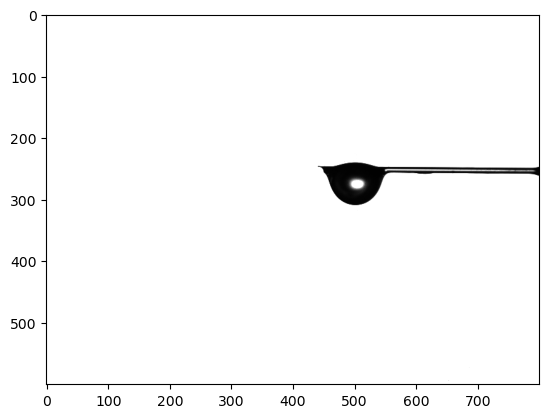

In [23]:
img = cv2.imread(location,cv2.IMREAD_GRAYSCALE)
img.shape
print(type(img))
plt.imshow(img, cmap='gray')
plt.show()

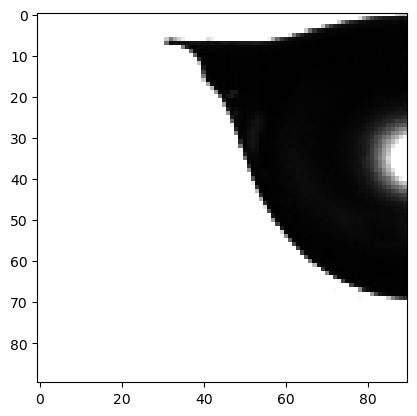

In [24]:
cropped_img = img[240:330,410:500] 
# trail and error done to crop the required portion of the image


plt.imshow(cropped_img, cmap='gray')
plt.show()


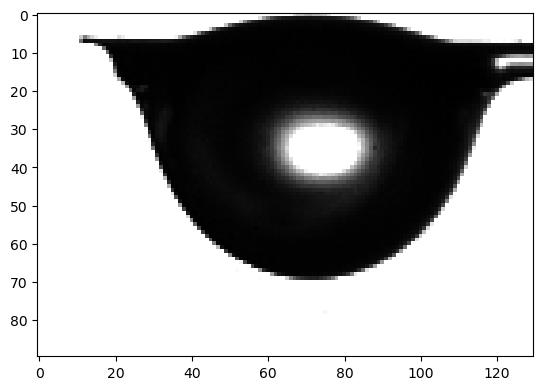

In [25]:
cropped_img = img[240:330,430:560] 
# trail and error done to crop the required portion of the image


plt.imshow(cropped_img, cmap='gray')
plt.show()

In [13]:
path = os.getcwd()
path_ = Path(path)
parent_path = path_.parent.absolute()
# path_but= os.path.join(parent_path, "Butanoln")
# path_A1 = os.path.join(parent_path, "Jet_A1n")
# os.mkdir(path_but)
# os.mkdir(path_A1)
# #creating new directories to store our new cropped and blurred images.

#redundant

In [14]:
def calculateDiameter(img: ndarray, crop: int)->float:
    max_h = 0
    max_w = 0
    size_w = 90 if crop==0 else 130
    size_h = 90  

    for i in range(90):
        max_h = max(size_h-np.count_nonzero(img[:,i])-10, max_h)
        max_w = max(size_w-np.count_nonzero(img[i,:]), max_w)
    
    return math.sqrt(max_h*max_w)
    

In [15]:
def calculateDiameterB(img: ndarray)->float:
    max_h = 0
    max_w = 0
    size_w = 90 
    size_h = 90  
    val = 1 #pixel value for mm that is converted
    for i in range(90):
        max_h = max(size_h-np.count_nonzero(img[:,i])-10, max_h)
        max_w = max(size_w-np.count_nonzero(img[i,:]), max_w)
    
    return math.sqrt(max_h*max_w)

In [16]:
def calculate(path: str, crop: int)->list:
    diameters = []
    for url in tqdm(os.listdir(path)):
        image = cv2.imread(url,cv2.IMREAD_GRAYSCALE)
        if image is not None:
            cropped_img = image[240:330,410:500] if crop==0 else image[240:330,430:560]
            eroded_img = cv2.erode(cropped_img, (3,3), iterations=1)
            blurred_img_ = cv2.medianBlur(eroded_img, 27, 0)
            ret, thresh = cv2.threshold(blurred_img_,250,255,cv2.THRESH_TOZERO)
            thresh[thresh>200] = 255
            thresh[thresh<200] = 0
            diameters.append(calculateDiameter(thresh,crop))
            
            
    return diameters
    

In [17]:
def calculateB(path: str)->list:
    diameters = []
    for url in tqdm(os.listdir(path)):
        image = cv2.imread(url,cv2.IMREAD_GRAYSCALE)
        if image is not None:
            cropped_img = image[240:330,410:500] 
            eroded_img = cv2.erode(cropped_img, (3,3), iterations=1)
            blurred_img_ = cv2.medianBlur(eroded_img, 27, 0)
            ret, thresh = cv2.threshold(blurred_img_,250,255,cv2.THRESH_TOZERO)
            thresh[thresh>200] = 255
            thresh[thresh<200] = 0
            diameters.append(calculateDiameterB(thresh))
            
            
    return diameters

In [18]:
path_but= 'C:\\Users\\dhana\\Downloads\\propulsion lab\\exp1\\Butanol'
path_a1='C:\\Users\\dhana\\Downloads\\propulsion lab\\exp1\\Jet A1'

In [19]:
diameters_but = calculateB(path_but)

100%|█████████████████████████████████████████████████████████████████████████████| 7905/7905 [00:41<00:00, 190.98it/s]


In [20]:
print(len(diameters_but))


7905


In [27]:
 diameters_a1=calculate(path_a1,1)

100%|███████████████████████████████████████████████████████████████████████████| 20315/20315 [02:06<00:00, 161.02it/s]


In [28]:
print(len(diameters_a1))

20315


In [ ]:
'''
1 pixel = 0.2645833333 mm
'''

In [29]:
diameters_a1_saved = diameters_a1

In [30]:
diameters_but_saved = diameters_but

In [31]:
print("Initial Diameter of A1 jet fuel :",diameters_a1_saved[0]*0.2645833333)
print("Initial diameter of Butanol :",diameters_but_saved[0]*0.2645833333)

Initial Diameter of A1 jet fuel : 21.100417153565548
Initial diameter of Butanol : 19.399570439535683


In [32]:
to_plot_but = [i*i/(diameters_but_saved[0]*diameters_but_saved[0]) for i in diameters_but]
to_plot_a1 = [i*i/(diameters_a1_saved[0]*diameters_a1_saved[0]) for i in diameters_a1]



In [44]:
x_a1 = np.arange(0/3000,20315/3000,1/3000)
x_but = np.arange(0/3000, 7905/3000, 1/3000)

m_but,_ = np.polyfit(to_plot_but, x_but,1)
m_a1,_ = np.polyfit(to_plot_a1, x_a1,1)
print("slope of butanol:", m_but)
print("slope of a1 jet :", m_a1)

slope of butanol: -2.344218348500232
slope of a1 jet : -4.454169947559496


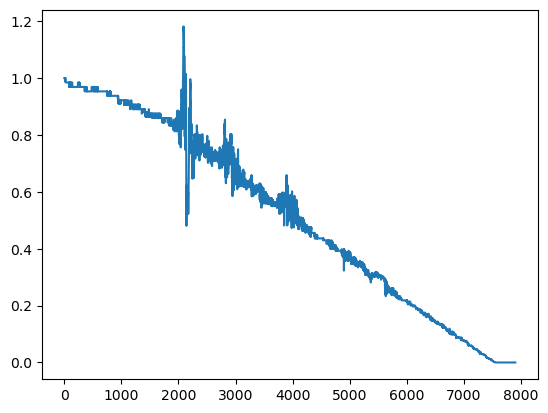

In [33]:
plt.plot(to_plot_but)

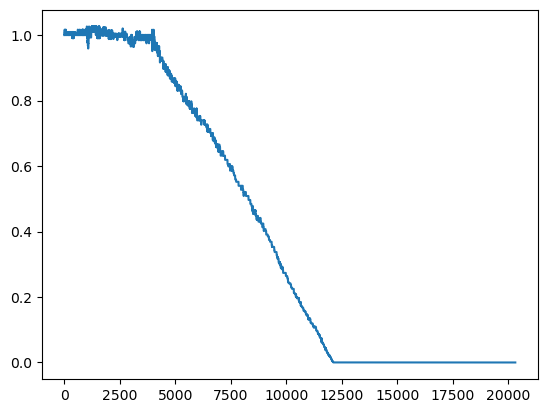

In [34]:
plt.plot(to_plot_a1)

In [ ]:
'''
Following kernels are some experimentation that was done by me, to reach accurate results.
'''

In [92]:
kernel = np.ones((5, 5), np.uint8)

In [27]:
# cropped_img[cropped_img<250]= 0
# cropped_img[cropped_img>250]=255

0.0010008811950683594


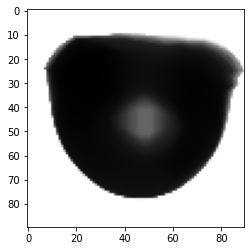

In [148]:
start = time.time()
blurred_img = cv2.medianBlur(cropped_img,27)
end = time.time()
print(end-start)
# cropped_img = cv2.GaussianBlur(cropped_img, (5,5),0)
plt.imshow(blurred_img, cmap='gray')
plt.show()


-0.0009982585906982422


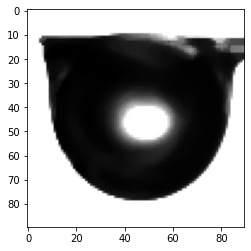

In [149]:
start = time.time()
blurred_img = cv2.medianBlur(cropped_img,5)
end = time.time()
print(start-end)
# cropped_img = cv2.GaussianBlur(cropped_img, (5,5),0)
plt.imshow(blurred_img, cmap='gray')
plt.show()

In [29]:
'''
The difference can be seen. The 5x5 kernel filters out the left rod. So, trail and error with further odd kernels, to see if 
it can filter out the right one as well.
'''

In [30]:
'''
Trying erosion.
Erosion: A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel are 1, otherwise, it is eroded (made to zero).
'''

"\nObservation:\n1. You can't use threshold to read width and height as the bubble keeps on regressing.\n2. If you want to automate the process, then first find if there is a curvature shape in the pic,\n    if yes, then crop that part \n(to be added)\n"

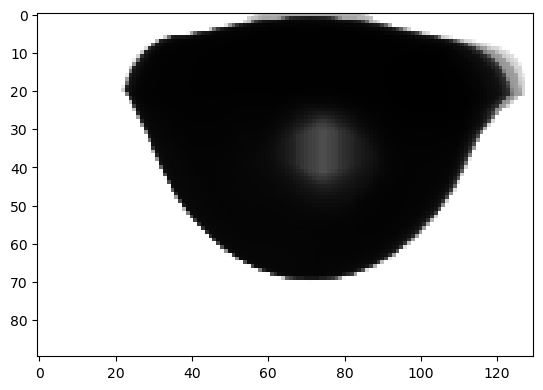

In [19]:
eroded_img = cv2.erode(cropped_img, (3,3), iterations=1)
blurred_img_ = cv2.medianBlur(eroded_img, 27, 0)
plt.imshow(blurred_img_, cmap='gray')
plt.show()

#the difference between the above blurred image and this is not very apparent.

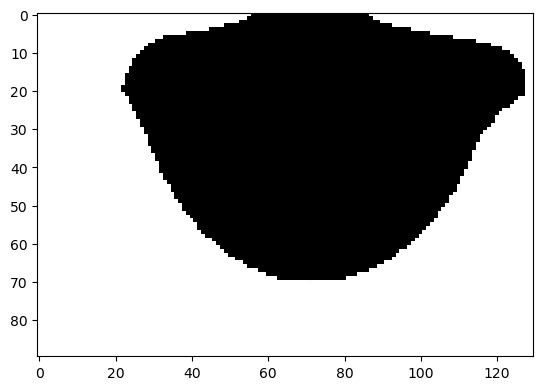

(90, 130)
[  0 255]


In [20]:
ret, thresh = cv2.threshold(blurred_img_,250,255,cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap='gray')
plt.show()
print(thresh.shape)
thresh[thresh>200] = 255
thresh[thresh<200] = 0
#threshold such that there is only 2 values in the image.
print(np.unique(thresh))

In [167]:
cnt,hierachy = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )
# mode (finds the outermost contour), method(stores all contour points)
# contours
# np.array(contours).shape -5

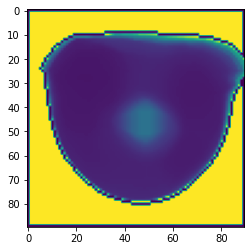

In [171]:
img1=cv2.drawContours(blurred_img_.copy(), cnt, 0, (0,0,0), 1 )
#-1 indicates all contour, 4th parameter represents color, 5th represents thickness.
plt.imshow(img1)
plt.show()

In [56]:
'''
to do: use heirachy
'''

'\nto do: use heirachy\n'

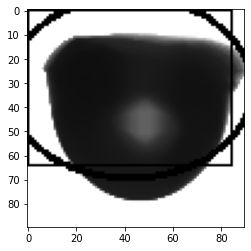

In [159]:
ellipse = cv2.fitEllipse(contours[0])
img2 = cv2.ellipse(blurred_img_, ellipse, (0,255,0),2)
plt.imshow(img2, cmap='gray')
plt.show()
#ecllipse is not working. 

In [ ]:
'''
Probable errors:
1. During calculation of width, maximum width might be along the rod. As the image is on grayscale, there mightnot be any droplet
    present but width comes out to be non-zero.
2. There is error in removing the right side of the rod. Let's assume 7-8% error that seeps in when we erode the image.
    The error would be mitigated when we take ratio.


P.s. There's a weird glitch. Even if I provide current path in my loop, it doesn't execute properly unless my running directory is 
same as that of the code that is being run at. Weird really.
'''